<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/EDP%20I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(a) Verificar que el siguiente es un problema de Sturm-Lioville y resolverlo:

$f''(x)+2f'(x)+λf'(x)=0,$ $0<x<1$

$f(0)=0,$ $f(1)=0$

(b) Usar las eigenfunciones de este problema para expandir en series de Fourier generalizadas la función:

$u(x)=e^{-x},$ $0\leq x \leq 1$

Calculamos el factor integrante que es:

$[e^{2x}f'(x)]'+λe^{2x}f(x)=0$

Luego $p(x)=e^{2x},$ $q(x)=0$, $σ(x)=e^{2x}$

$k_1=1,$ $k_2=0$

$k_3=1,$ $k_4=0$

De lo anterior podemos concluir que es un problema regular de Sturm-Lioville.

Continuamos resolviendo el problema de Sturm-Lioville:

In [ ]:
import sympy as sp
from sympy import symbols, Function, Eq, dsolve, Derivative, exp, sin, cos, simplify, integrate, pprint

x, lam = symbols('x lambda')
y = Function('y')

edo = Eq(Derivative(y(x), x, 2) + 2*Derivative(y(x), x) + lam*y(x), 0)
pprint(edo)

mu = sp.exp(2*x)

edo_mu = simplify(mu * edo.lhs)

print("\nEcuación multiplicada por el factor integrante e^{2x}:")
pprint(edo_mu)

sol = dsolve(edo, y(x))
pprint(sol)

C1, C2 = symbols('C1 C2')
gen_sol = sol.rhs.subs('C1', C1).subs('C2', C2)

r = symbols('r')
char_eq = Eq(r**2 + 2*r + lam, 0)
roots = sp.solve(char_eq, r)
print("\nRaíces características:")
pprint(roots)

n = symbols('n', integer=True, positive=True)
lam_n = (n*sp.pi)**2
general_solution = sp.exp(-x)*(C1*sp.cos(n*sp.pi*x) + C2*sp.sin(n*sp.pi*x))

phi_n = sp.exp(-x)*sp.sin(n*sp.pi*x)

u = sp.exp(-x)

num = integrate(u * phi_n * sp.exp(2*x), (x, 0, 1))
den = integrate(phi_n**2 * sp.exp(2*x), (x, 0, 1))
coef_n = simplify(num / den)

print("\nCoeficiente a_n de la serie de Fourier generalizada:")
pprint(coef_n)


                       2           
           d          d            
λ⋅y(x) + 2⋅──(y(x)) + ───(y(x)) = 0
           dx           2          
                      dx           

Ecuación multiplicada por el factor integrante e^{2x}:
⎛                       2       ⎞     
⎜           d          d        ⎟  2⋅x
⎜λ⋅y(x) + 2⋅──(y(x)) + ───(y(x))⎟⋅ℯ   
⎜           dx           2      ⎟     
⎝                      dx       ⎠     
             ⎛  _______    ⎞          ⎛  _______    ⎞
           x⋅⎝╲╱ 1 - λ  - 1⎠       -x⋅⎝╲╱ 1 - λ  + 1⎠
y(x) = C₁⋅ℯ                  + C₂⋅ℯ                  

Raíces características:
⎡    _______        _______    ⎤
⎣- ╲╱ 1 - λ  - 1, ╲╱ 1 - λ  - 1⎦

Coeficiente a_n de la serie de Fourier generalizada:
  ⎛        n⎞
2⋅⎝1 - (-1) ⎠
─────────────
     π⋅n     


Ahora empezamos con el inciso b), calculamos la eigenfunción para poder expandir la serie de Fourier:

In [ ]:
phi_n = sp.exp(-x) * sp.sin(n*sp.pi*x)
u = sp.exp(-x)

r = sp.exp(2*x)

numerador = integrate(u * phi_n * r, (x, 0, 1))
denominador = integrate(phi_n**2 * r, (x, 0, 1))

a_n = simplify(numerador / denominador)

print("Coeficiente general a_n para la serie de Fourier generalizada:")
pprint(a_n)

print("\nEvaluación de a_n para varios n:")
for k in range(1, 6):
    val = a_n.subs(n, k).evalf()
    print(f"a_{k} =", val)

from sympy import Sum, oo
n_odd = 2*n - 1
phi_n_odd = sp.exp(-x) * sp.sin(n_odd * sp.pi * x)
a_n_odd = 4 / (n_odd * sp.pi)
serie = Sum(a_n_odd * phi_n_odd, (n, 1, oo))

print("\nSerie de Fourier generalizada (solo términos impares):")
pprint(serie)


Coeficiente general a_n para la serie de Fourier generalizada:
  ⎛        n⎞
2⋅⎝1 - (-1) ⎠
─────────────
     π⋅n     

Evaluación de a_n para varios n:
a_1 = 1.27323954473516
a_2 = 0
a_3 = 0.424413181578388
a_4 = 0
a_5 = 0.254647908947033

Serie de Fourier generalizada (solo términos impares):
 ∞                            
____                          
╲                             
 ╲       -x                   
  ╲   4⋅ℯ  ⋅sin(π⋅x⋅(2⋅n - 1))
  ╱   ────────────────────────
 ╱          π⋅(2⋅n - 1)       
╱                             
‾‾‾‾                          
n = 1                         


Ahora hacemos la gráfica:

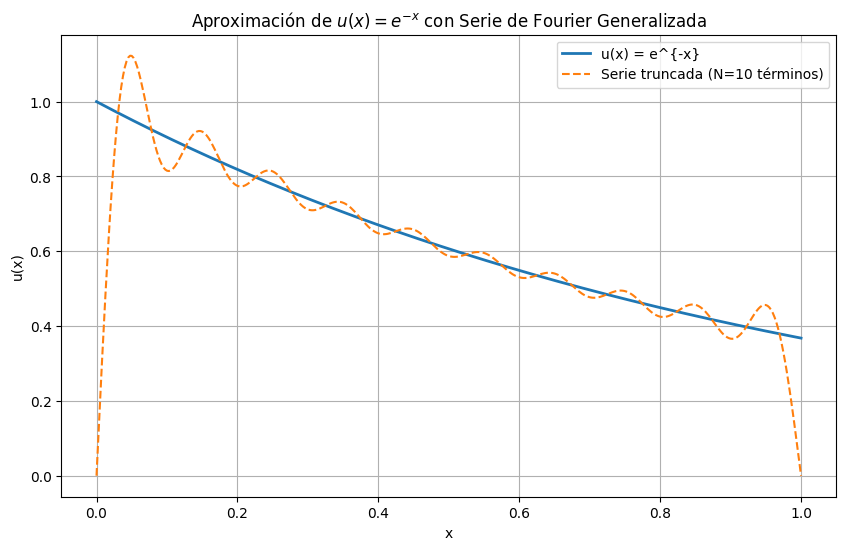

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(0, 1, 400)
u_func = sp.lambdify(x, u, modules=['numpy'])

N = 10
serie_aprox = 0
for k in range(1, N+1):
    n_k = 2*k - 1
    coef = 4 / (n_k * np.pi)
    term = coef * np.exp(-x_vals) * np.sin(n_k * np.pi * x_vals)
    serie_aprox += term

u_vals = u_func(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, u_vals, label='u(x) = e^{-x}', linewidth=2)
plt.plot(x_vals, serie_aprox, label=f'Serie truncada (N={N} términos)', linestyle='--')
plt.title('Aproximación de $u(x) = e^{-x}$ con Serie de Fourier Generalizada')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()
